In [1]:
import os
import sys
#TO RUN IN HOMEENV I NEED THIS... MIGHT HAVE TO REMOVE
sys.path.append("..")
import plotters
import reader
from DataTransformer import DataTransformer
import pandas as pd
import plotters_help
import seaborn as sns

%load_ext autoreload
%autoreload 2

os.chdir('../') # work from project root so the reader gets the right paths
print(os.getcwd())

/home/linus/Dokumente/Studium/Master/Amsterdam/02_DisSys/Project/CloudScheduling/plotter_4_cloud


In [2]:
export_base_path = "/home/linus/Dropbox/Apps/Overleaf/DistributedSystems_Group2/graphs/"

In [3]:
sns.set(font_scale = 1.2)

In [4]:
data = reader.sort_dfs(["ELoP", "HEFT", "MinMin", "MaxMin", "ACO", "Random"])
transformer = DataTransformer(data)

# ECDF for makespan

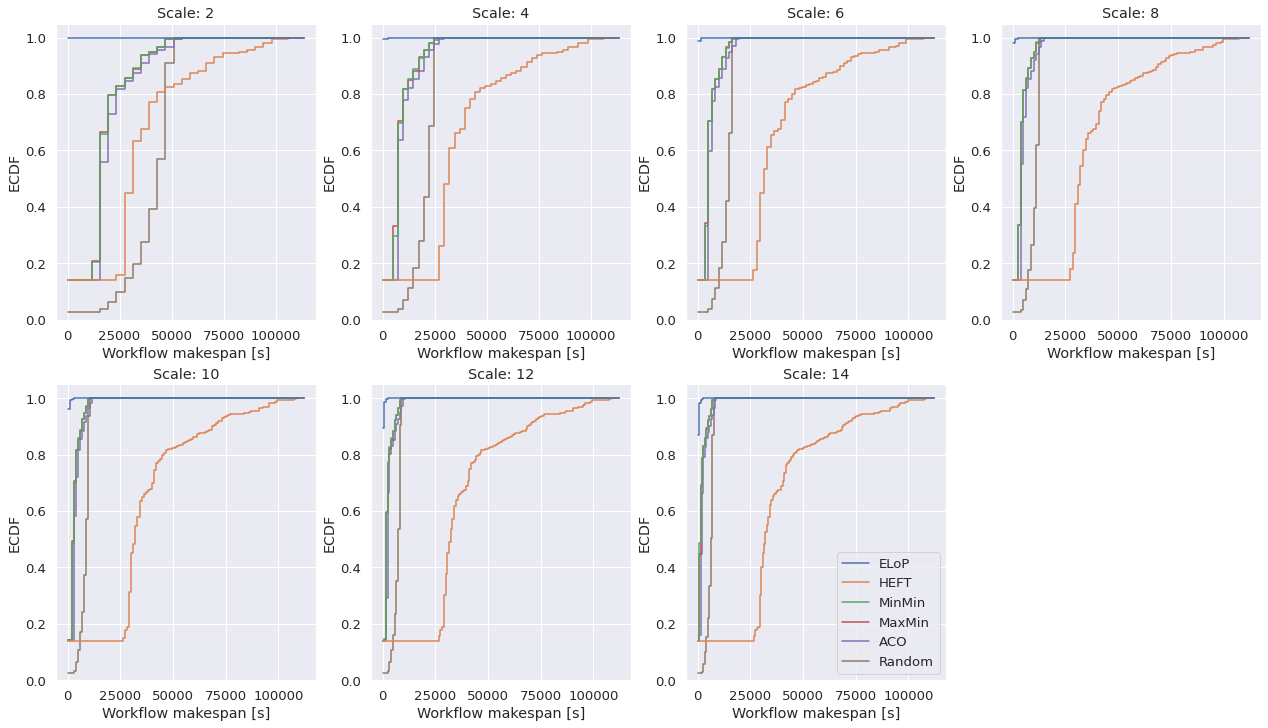

In [19]:
ecdf_data, ecdf_meta = transformer.to_makespan_cdf_per_scale("askalon-ee2-parquet", "homogeneous", export_base_path + "exp_scale_ecdf.png")

plotters.create_makespan_cdf_order_scale(ecdf_data, ecdf_meta)

# Electricity

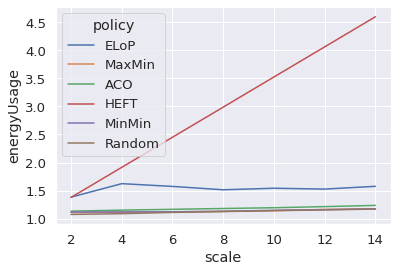

In [6]:
electricity_data, electricity_meta = transformer.to_electricity_scale("askalon-ee2-parquet", "homogeneous", export_base_path + "exp_scale_electricity.png")

plotters.create_energy_plot_scale(electricity_data, electricity_meta)

# Utilization

In [7]:
utilization_data, utilization_meta = transformer.to_utilization_table("askalon-ee2-parquet", "homogeneous", "exp_scale_utilization.png")

pd.options.display.float_format = "{:,.2f}".format
with open(export_base_path + "exp_scale_utilization.tex", "w") as text_file:
    text_file.write(plotters_help.latex_with_lines(utilization_data))

utilization_data

,2,4,6,8,10,12,14
policy,,,,,,,
ELoP,0.24,0.18,0.20,0.21,0.21,0.21,0.21
HEFT,0.40,0.20,0.13,0.10,0.08,0.07,0.06
MinMin,0.78,0.76,0.74,0.71,0.66,0.63,0.60
MaxMin,0.78,0.76,0.74,0.71,0.67,0.63,0.60
ACO,0.74,0.69,0.65,0.62,0.60,0.57,0.53
Random,0.78,0.75,0.69,0.66,0.63,0.60,0.58


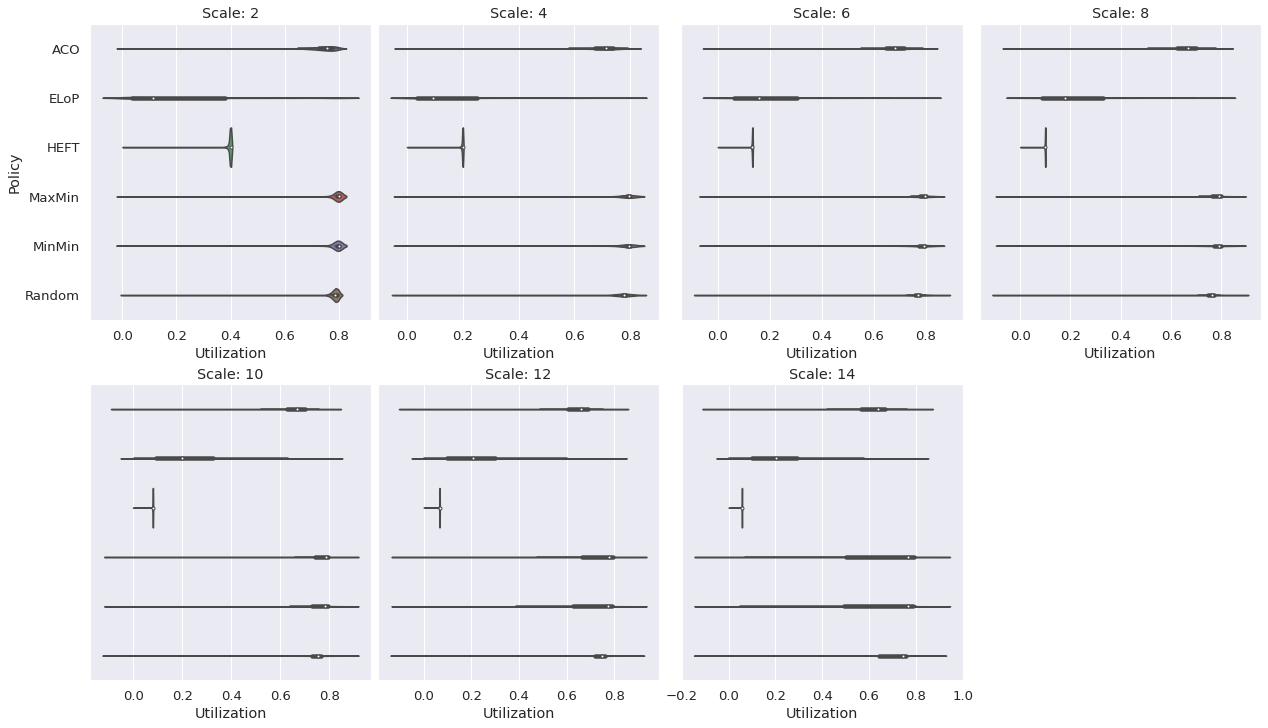

In [20]:
utilization_data_violin, utilization_meta_violin = transformer.to_utilization_violin_scale("askalon-ee2-parquet", "homogeneous", export_base_path + "exp_scale_utilization_violin.png")
plotters.create_utilization_violin_scale(utilization_data_violin, utilization_meta_violin)